In [21]:
%matplotlib inline
import matplotlib.pyplot as plt
#plt.rcParams['figure.figsize'] = [15, 12]
#plt.rcParams.update({'font.size': 12}) 

import os
'''import bokeh
os.environ['JPY_PARENT_PID'] = '3'
bokeh.__version__

from bokeh.io import output_notebook

output_notebook()'''

#https://www.backtrader.com/docu/quickstart/quickstart/

'''from Quantapp.Portfolio  import Portfolio
from Quantapp.Universe import  Universe
from Quantapp.Algorithm import Algorithm'''

from Quantapp.DataManager import DataManager
import plotly.express as px
import backtrader as bt
import numpy as np
import json
import os

import pandas as pd
#algorithm = Algorithm()
dm        = DataManager()
period = '2y'
interval = '1d'

sp500 = dm.retrieve_ticker_data('SPY', period=period,interval=interval)
nasdaq = dm.retrieve_ticker_data('QQQ', period=period,interval=interval)
russell_2000 = dm.retrieve_ticker_data('IWM', period=period,interval=interval)
dija = dm.retrieve_ticker_data('DIA', period=period,interval=interval)

risk_free_rate   = dm.retrieve_ticker_data('^IRX',period=period,interval=interval).reindex_like(sp500)
vix   = dm.retrieve_ticker_data('^VIX',period=period,interval=interval).reindex_like(sp500)




Starting Portfolio Value: 100000.00
Starting Portfolio Value: 139542.29


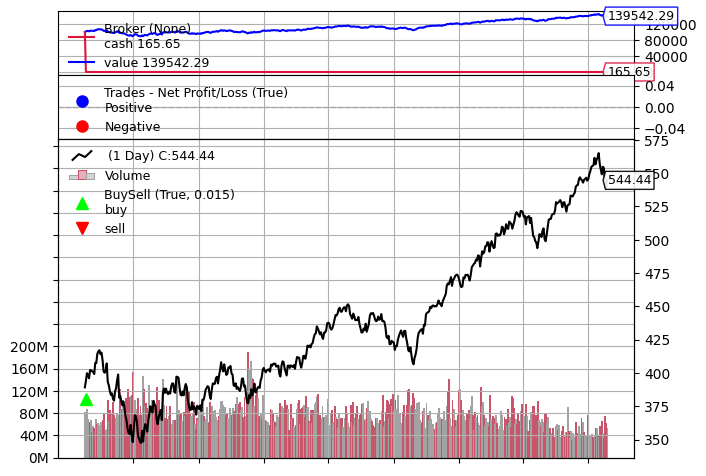

[[<Figure size 640x480 with 4 Axes>]]

In [22]:
class BuyHoldStrategy(bt.Strategy):

    def log(self,txt,dt=None):
        dt = dt or self.datas[0].datetime.date(0)
        print( '%s, %s' % (dt.isoformat(),txt))
    
    def __init__(self):
        # Keep a reference to the "close" line in the data[0] dataseries
        self.dataclose = self.datas[0].close
        self.buy_executed = False  # Flag to track if the buy order has been executed


    def next(self):
        #self.log(f'Close, {self.dataclose[0]:.2f}, total cash: {self.broker.get_cash():.2f}, portfolio_value: {self.broker.get_value():.2f}' )
        size = self.broker.get_cash() // self.dataclose[0]
        self.buy(size=size)
    

    

sp500_data = bt.feeds.PandasData(dataname=pd.DataFrame(sp500))
nasdaq_data = bt.feeds.PandasData(dataname=pd.DataFrame(nasdaq))

#Set conditions
cerebro = bt.Cerebro()
cerebro.broker.setcash(100000.0)
cerebro.addstrategy(BuyHoldStrategy)
cerebro.adddata(sp500_data)


#Run, Analyze
print('Starting Portfolio Value: %.2f' % cerebro.broker.getvalue())
result = cerebro.run()
print('Starting Portfolio Value: %.2f' % cerebro.broker.getvalue())
cerebro.plot(iplot=False)
# = cerebro.plot(style='candlestick', volume=True,iplot=False)


In [23]:
class VIX_Strategy(bt.Strategy):
    params = (
        ('period',50),
    )
    def log(self,txt,dt=None):
        dt = dt or self.datas[0].datetime.date(0)
        print( '%s, %s' % (dt.isoformat(),txt))
    
    def __init__(self):
        self.sp500_close = self.datas[0].close
        self.vix_close   = self.datas[1].close
        self.vix_50_sma = bt.indicators.SimpleMovingAverage(self.datas[1], period=self.params.period)

    def next(self):
       
        if self.vix_close[0] > self.vix_50_sma[0]:
            self.buy()
        self.log(f'Close, {self.sp500_close[0]:.2f}, total cash: {self.broker.get_cash()}' )
        

sp500_data = bt.feeds.PandasData(dataname=pd.DataFrame(sp500))
vix_data = bt.feeds.PandasData(dataname=pd.DataFrame(vix))

    
cerebro = bt.Cerebro()
cerebro.broker.setcash(100000.0)
cerebro.adddata(sp500_data)
cerebro.adddata(vix_data)
cerebro.addstrategy(VIX_Strategy)

print('Starting Portfolio Value: %.2f' % cerebro.broker.getvalue())
result = cerebro.run()
print('Starting Portfolio Value: %.2f' % cerebro.broker.getvalue())
cerebro.plot(iplot = False)


Starting Portfolio Value: 100000.00
2022-10-05, Close, 367.42, total cash: 100000.0
2022-10-06, Close, 363.63, total cash: 100000.0
2022-10-07, Close, 353.48, total cash: 100000.0
2022-10-10, Close, 350.78, total cash: 100000.0
2022-10-11, Close, 348.56, total cash: 100000.0
2022-10-12, Close, 347.41, total cash: 100000.0
2022-10-13, Close, 356.58, total cash: 100000.0
2022-10-14, Close, 348.46, total cash: 100000.0
2022-10-17, Close, 357.41, total cash: 100000.0
2022-10-18, Close, 361.61, total cash: 100000.0
2022-10-19, Close, 359.05, total cash: 100000.0
2022-10-20, Close, 356.04, total cash: 100000.0
2022-10-21, Close, 364.69, total cash: 100000.0
2022-10-24, Close, 369.15, total cash: 100000.0
2022-10-25, Close, 375.05, total cash: 100000.0
2022-10-26, Close, 372.22, total cash: 100000.0
2022-10-27, Close, 370.23, total cash: 100000.0
2022-10-28, Close, 379.04, total cash: 100000.0
2022-10-31, Close, 376.30, total cash: 100000.0
2022-11-01, Close, 374.66, total cash: 100000.0
2022

ValueError: Axis limits cannot be NaN or Inf

Starting Portfolio Value: 100000.00
2022-10-05, Close, 367.42, total cash: 100000.0
2022-10-06, Close, 363.63, total cash: 99634.01618395689
2022-10-07, Close, 353.48, total cash: 99274.51182407951
2022-10-10, Close, 350.78, total cash: 98919.88890231245
2022-10-11, Close, 348.56, total cash: 98570.83922935232
2022-10-12, Close, 347.41, total cash: 98221.85773618877
2022-10-13, Close, 356.58, total cash: 97881.60645177063
2022-10-14, Close, 348.46, total cash: 97522.51128913327
2022-10-17, Close, 357.41, total cash: 97167.8396223653
2022-10-18, Close, 361.61, total cash: 96802.33322986668
2022-10-19, Close, 359.05, total cash: 96442.80933160051
2022-10-20, Close, 356.04, total cash: 96084.22084477256
2022-10-21, Close, 364.69, total cash: 95728.46771208686
2022-10-24, Close, 369.15, total cash: 95362.22082265493
2022-10-25, Close, 375.05, total cash: 94993.14837060323
2022-10-26, Close, 372.22, total cash: 94621.31852900395
2022-10-27, Close, 370.23, total cash: 94248.07587040916
2022-

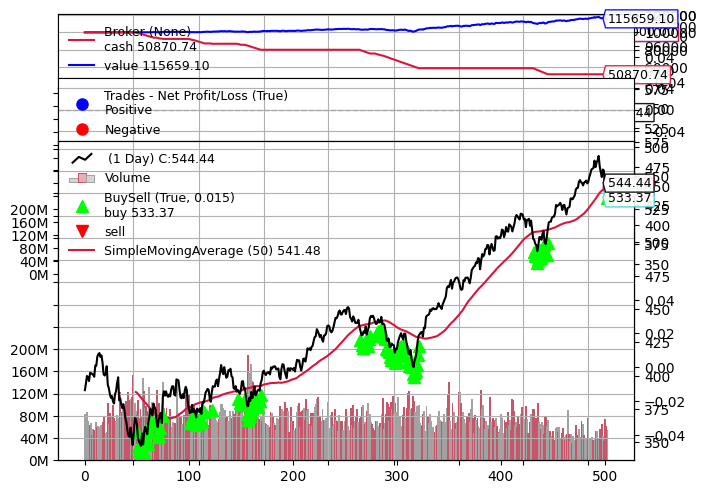

[[<Figure size 640x480 with 9 Axes>]]

In [24]:
class SMA_50_Strategy(bt.Strategy):
    params = (
        ('period',50),
    )
    def log(self,txt,dt=None):
        dt = dt or self.datas[0].datetime.date(0)
        print( '%s, %s' % (dt.isoformat(),txt))
    
    def __init__(self):
        self.sp500_close = self.datas[0].close
        self.sma_50 = bt.indicators.SimpleMovingAverage(self.datas[0], period=self.params.period)

    def next(self):
       
        if self.sp500_close[0] < self.sma_50[0]:
            self.buy()
        self.log(f'Close, {self.sp500_close[0]:.2f}, total cash: {self.broker.get_cash()}' )
        

sp500_data = bt.feeds.PandasData(dataname=pd.DataFrame(sp500))

    
cerebro = bt.Cerebro()
cerebro.broker.setcash(100000.0)
cerebro.adddata(sp500_data)
cerebro.addstrategy(SMA_50_Strategy)

print('Starting Portfolio Value: %.2f' % cerebro.broker.getvalue())
result = cerebro.run()
print('Starting Portfolio Value: %.2f' % cerebro.broker.getvalue())
cerebro.plot(iplot=False)
